In [2]:
#set
import pandas as pd
import numpy as np  

# loading ecxel file
file_path = "Loan_default.csv.xlsx"
df = pd.read_excel(file_path)
print(df.head())
print("first 16000 rows:")
print(df.head(16000))

print("Rows, Columns:", df.shape)



       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

# This coding section uses Pandas to load the dataset, first attempting to read it as a CSV and falling back to Excel if needed, before printing the DataFrame's head and structure summary (df.info()) to confirm successful loading and identify data types and missing values.

In [3]:
# Check unique values for the Education column to create the correct mapping
import pandas as pd

file_path = "Loan_default.csv.xlsx"
df = pd.read_excel(file_path)
education_levels = df['Education'].unique()
print("Unique Education Levels:")
print(education_levels)

Unique Education Levels:
["Bachelor's" "Master's" 'High School' 'PhD']


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "Loan_default.csv.xlsx"
df = pd.read_excel(file_path)

# 1. FEATURE ENGINEERING: Creating New Features

# Loan-to-Income Ratio (LTI) - Total Loan amount vs. Annual Income
# Assuming Income is Annual Income
df['LTI'] = df['LoanAmount'] / df['Income']
print("LTI feature created.")
print(df[['LoanAmount', 'Income', 'LTI']].head())

LTI feature created.
   LoanAmount  Income       LTI
0       50587   85994  0.588262
1      124440   50432  2.467481
2      129188   84208  1.534154
3       44799   31713  1.412638
4        9139   20437  0.447179


# This section performs feature engineering by calculating the Loan-to-Income (LTI) ratio, which divides the LoanAmount by the customer's Income. This new ratio is added to the DataFrame, providing a powerful and standardized measure of risk for loan default prediction.

In [5]:
# 2. ENCODING CATEGORICAL VARIABLES

# Label Encoding (for Ordinal Data: Education)
# Assign numerical values based on rank.
education_mapping = {
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'PhD': 4
}
df['Education_Encoded'] = df['Education'].map(education_mapping)
df.drop('Education', axis=1, inplace=True) # Drop the original column

# One-Hot Encoding (for Nominal Data: LoanPurpose)
# Creates new binary columns (dummy variables).
df = pd.get_dummies(df, columns=['LoanPurpose'], drop_first=True, prefix='Purpose')
print("Categorical variables encoded.")
print(df.head())

Categorical variables encoded.
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... HasMortgage  \
0               4         15.23        36      0.44  ...         Yes   
1               1          4.81        60      0.68  ...          No   
2               3         21.17        24      0.31  ...         Yes   
3               3          7.07        24      0.23  ...          No   
4               4          6.51        48      0.73  ...          No   

  HasDependents HasCoSigner Default       LTI  Education_Encoded  \
0           Yes         Yes       0  0.58

# Categorical features are prepared for modeling by first Label Encoding the ordinal Education column into numerical data and dropping the original text column. The nominal LoanPurpose column is converted using One-Hot Encoding to create new binary indicator variables.

In [6]:
from sklearn.model_selection import train_test_split

# 3. DATA SPLIT: Final Preparation

# Define Features (X) and Target (y)
# Drop identifying/redundant columns: LoanID, and the components of engineered ratios (Income, LoanAmount)
X = df.drop(columns=['Default', 'LoanID', 'Income', 'LoanAmount'])
y = df['Default']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size=0.2, random_state=42,)

# Display results
print(f" Feature Engineering, Encoding, and Data Split Complete.")
print(f"Total rows in original data: {len(df)}")
print(f"Training set size (80%): {len(X_train)}")
print(f"Testing set size (20%): {len(X_test)}")
print(X_train.head())


 Feature Engineering, Encoding, and Data Split Complete.
Total rows in original data: 255347
Training set size (80%): 204277
Testing set size (20%): 51070
        Age  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  \
137187   18          846              26               2         10.47   
230334   47          748              30               2         19.72   
19687    26          453               7               2         24.25   
106509   53          533             107               3         14.44   
242291   49          840               0               4         24.48   

        LoanTerm  DTIRatio EmploymentType MaritalStatus HasMortgage  \
137187        60      0.81  Self-employed        Single         Yes   
230334        36      0.73     Unemployed      Divorced          No   
19687         12      0.45  Self-employed       Married          No   
106509        60      0.17  Self-employed        Single         Yes   
242291        12      0.11      Part-time    

# The prepared features (x) and the target variable (y) are defined by dropping identifying or unecessary columns like LoanID and the original ratio components. Finally, the data is split into an 80% training and 20% testing set, ensuring the distribution of the target variable is maintained across both groups.

# MODEL BUIDING WITH RANDOM FOREST CLASSIFIER

#How the model random classifiers works
"""
Random Forest Classifier is an ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting. Here's how it works:
1. Data Sampling: The algorithm starts by creating multiple subsets of the original training data using a technique called bootstrap sampling. Each subset is created by randomly selecting samples from the original dataset with replacement.
2. Decision Tree Creation: For each subset of data, a decision tree is constructed. However, unlike traditional decision trees that consider all features for splitting nodes, Random Forests introduce randomness by selecting a random subset of features at each split. This helps to create diverse trees.
3. Tree Growth: Each decision tree is grown to its maximum depth without pruning, allowing it
   to capture complex patterns in the data.
4. Aggregation of Predictions: Once all the trees are built, the Random Forest makes predictions
   by aggregating the predictions from each individual tree. For classification tasks, this is typically done through majority voting, where the class that receives the most votes from the trees is chosen as the final prediction.
5. Final Output: The final output of the Random Forest is the aggregated prediction, which tends to be more accurate and robust than predictions from individual decision trees.
The key advantages of Random Forest Classifier include its ability to handle large datasets with high dimensionality
and its robustness to overfitting due to the averaging of multiple trees. It is widely used for both classification and regression tasks in various domains.
"""



In [7]:


# Model Building with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Encode remaining categorical columns in X_train and X_test
categorical_cols = ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner']
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in categorical_cols:
	# Use pandas get_dummies for one-hot encoding
	X_train_encoded = pd.get_dummies(X_train_encoded, columns=[col], drop_first=True)
	X_test_encoded = pd.get_dummies(X_test_encoded, columns=[col], drop_first=True)

# Align columns in test set to match train set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Define and train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))




Confusion Matrix:
[[45027   143]
 [ 5650   250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.64      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



# Week 4; Validation and reporting.

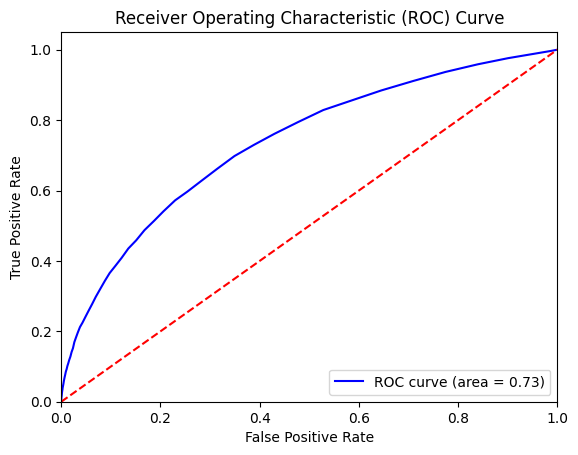

AUC: 0.73


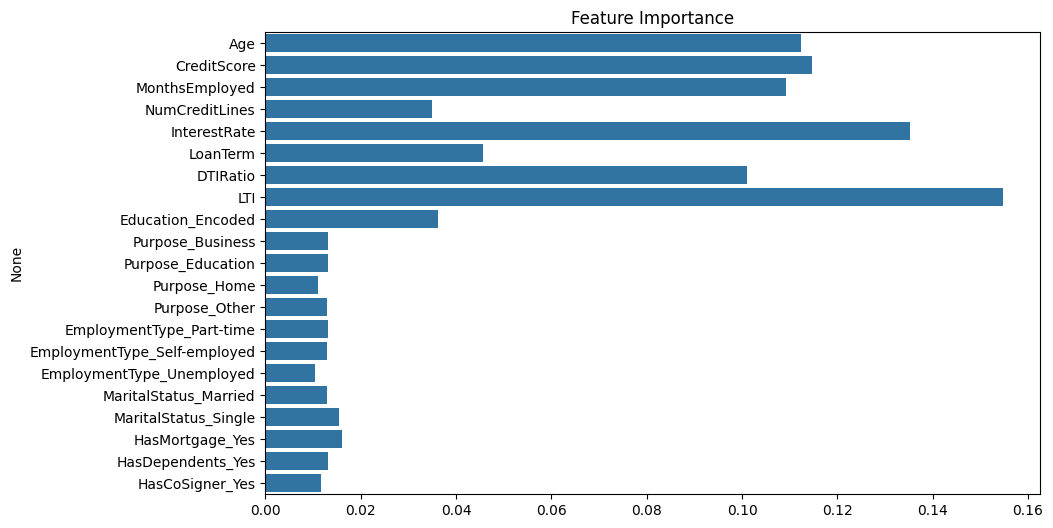

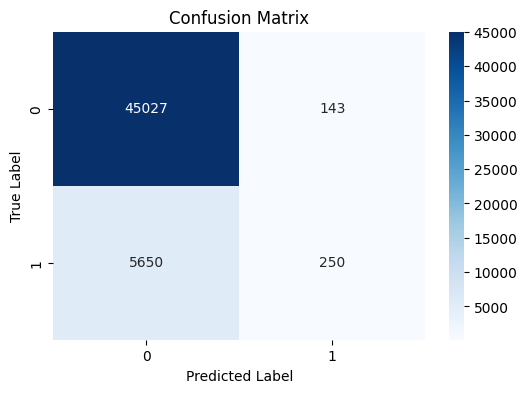

Accuracy: 0.89


In [ ]:
#validation and Reporting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_prob = rf_classifier.predict_proba(X_test_encoded)[:, 1]


# ROC Curve 

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#AuC Value
print(f"AUC: {roc_auc:.2f}")


# Feature Importance Plot
importances = rf_classifier.feature_importances_
feature_names = X_train_encoded.columns
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#model accuracy
def calculate_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy
print(f"Accuracy: {calculate_accuracy(y_test, y_pred):.2f}")

#!/usr/bin/env python3
